# Setup Blocks

In [1]:
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
from unityagents import UnityEnvironment
import sys

In [2]:
from agent import Agent # Import the Agent class

agent = Agent(state_size=37, action_size=4, seed=0) # Instantiate an agent


cuda:0


In [3]:
if sys.platform == "darwin":
    env = UnityEnvironment(file_name="Banana.app")
    # If running on Mac, use Banana.app
elif sys.platform == "linux":
    env = UnityEnvironment(file_name="Banana_Linux/Banana.x86")
    # If running on Linux, use Banana.x86

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [4]:
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
# Set up the brain

# Train the Agent

Episode 100	Average Score: 0.58  
Episode 200	Average Score: 4.28  
Episode 300	Average Score: 6.50  
Episode 400	Average Score: 10.46  
Solved for +13 in 475 episodes  


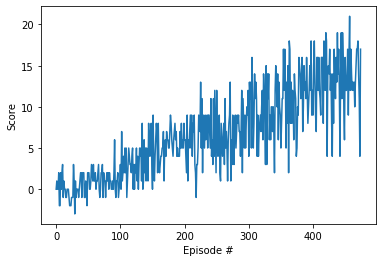

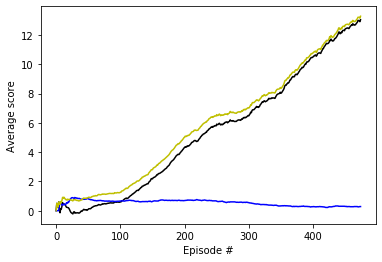

In [5]:
def dqn(n_episodes = 5000, eps_start = 1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                         # list containing scores from each episode
    scores_window = deque(maxlen=100)   # last 100 scores
    scores_means = []                   # list containing average scores from the previous 100 scores from the last episode
    eps = eps_start                     # initialize epsilon

    blues_window = deque(maxlen=100)    # last 100 blue banana totals
    blues_means = []                    # list containing average number of blues
    yellows_window = deque(maxlen=100)  # last 100 yellow banana totals
    yellows_means = []                  # list containing average number of yellows
    """Track yellow and blue bananas per episode and averages of each over a 100 episode window
    
        blues_window: number of blue bananas collected in each of the last 100 episodes
        yellows_window: number of yellow bananas collected in each of the last 100 episodes
        blues_means: Average number of blue bananas collected in the last 100 episodes
        yellows_means: Average number of yellows bananas collected in the last 100 episodes
    """
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0                                          # initialize the score
        blues = 0                                          # initialize number of blue bananas
        yellows = 0                                        # initialize number of yellow bananas
        while True:                                        # continue the episode until done
            action = agent.act(state, eps)                 # step the environment
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            if reward == 1:
                yellows += 1                               # Increment yellow banana count on positive reward
            elif reward == -1:
                blues += 1                                 # Increment blue banana count on positive reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, action, reward, next_state, done) # step the agent
            state = next_state                             # next_state becomes current state for next iteration
            score += reward                                # update the score with the reward
            if done:
                break                                      # if episode is complete, break
        blues_window.append(blues)           # add number of blues to blues window
        yellows_window.append(yellows)       # add number of yellows to yellow window
        scores_window.append(score)          # add most recent score to last 100
        scores.append(score)                 # add most recent score to list of all scores
        scores_means.append(np.mean(scores_window)) # add average of scores from the past game to the window
        blues_means.append(np.mean(blues_window))   # get the blues average from the last 100 episodes and append to blues averages
        yellows_means.append(np.mean(yellows_window)) # get the yellows average from the last 100 episodes and append to yellow averages
        eps = max(eps_end, eps_decay * eps)  # decrease epsilon
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}  '.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window) > 13:               # first solved for +13
            print("Solved for +13 in {} episodes  ".format(i_episode))
            break
    return scores, scores_means, blues_means, yellows_means

scores, scores_means, blues_means, yellows_means = dqn()

agent.save() # save the trained model parameters

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

# plot the average scores and average blues and yellows for the last 100
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.arange(len(scores_means)), scores_means, 'k-')    # plot a black line for average reward
ax.plot(np.arange(len(blues_means)), blues_means, 'b-')      # plot a blue line for average number of blue bananas
ax.plot(np.arange(len(yellows_means)), yellows_means, 'y-')  # plot a yellow line for average number of yellow bananas
plt.ylabel('Average score')
plt.xlabel('Episode #')
plt.show()